<h1 align="center">
<b>Московский государственный технический университет им. Н.Э. Баумана</b>
</h1>

<h1 align="center"> Факультет «Информатика и системы управления» </h1>
<h1 align="center"> Кафедра ИУ5 «Системы обработки информации и управления </h1>

<h1 align="center">Рубежный контроль 1</h1>
<h1 align="center">Вариант №14</h1>
<h4 align="right">Выполнил:</h4>
<h4 align="right">студент группы ИУ5-22М</h4>
<h4 align="right">Хижняков Вадим</h4>


# Задание

Каждая задача предполагает использование набора данных. Набор данных выбирается Вами произвольно с учетом следующих условий:

* Вы можете использовать один набор данных для решения всех задач, или решать каждую задачу на своем наборе данных.
* Набор данных должен отличаться от набора данных, который использовался в лекции для решения рассматриваемой задачи.
* Вы можете выбрать произвольный набор данных (например тот, который Вы использовали в лабораторных работах) или создать собственный набор данных (что актуально для некоторых задач, например, для задач удаления псевдоконстантных или повторяющихся признаков).
* Выбранный или созданный Вами набор данных должен удовлетворять условиям поставленной задачи. Например, если решается задача устранения пропусков, то набор данных должен содержать пропуски.

## Задача 1

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".

## Задача 2

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

## Дополнительно

Для произвольной колонки данных построить гистограмму

# Импортируем библиотеки

In [1]:
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

# Загружаем набор данных

In [3]:
raw_df = pd.read_csv('Employee.csv')
raw_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
raw_df.shape

(4653, 9)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
raw_df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'EverBenched', 'Education','City']

for column in categorical_columns:
    raw_df[column] = label_encoder.fit_transform(raw_df[column])

raw_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


# Задание 1

### Нормализуем возраст

In [8]:
age_df = pd.DataFrame(raw_df['Age'])
age_df.head()

,Age
0,34
1,28
2,38
3,27
4,24


#### Исходное распределение

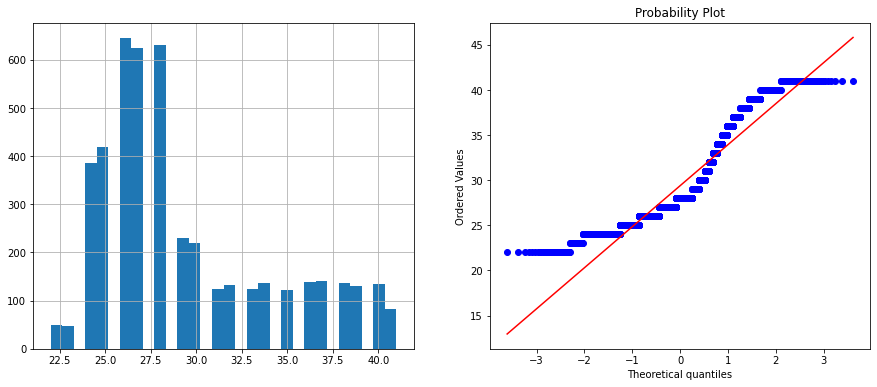

In [9]:
diagnostic_plots(age_df, 'Age')

In [10]:
age_df['Age'] = age_df['Age']**(1/2)
age_df.head()

,Age
0,5.830952
1,5.291503
2,6.164414
3,5.196152
4,4.898979


#### Квадратный корень

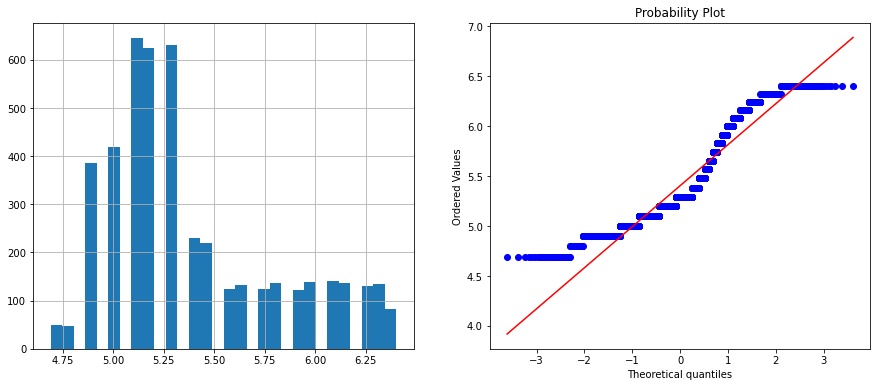

In [11]:
diagnostic_plots(age_df, 'Age')

# Задание 2

### Делим датафрейм

In [12]:
df_target = raw_df[['LeaveOrNot']] # таргет признак
df_target

,LeaveOrNot
0,0
1,1
2,0
3,1
4,1
...,...
4648,0
4649,1
4650,1
4651,0


In [13]:
df_data = raw_df.drop(['LeaveOrNot'], axis=1)
df_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


### Логистическая регрессия

In [14]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(df_data, df_target)
# Коэффициенты регрессии
e_lr1.coef_

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 2.12668061e-01,  4.71972286e-04,  3.51125480e-01,
        -4.13891545e-01, -2.43625928e-02, -7.81922117e-01,
         6.33661650e-01, -4.89640345e-02]])

In [15]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(df_data, df_target)
sel_e_lr1.get_support()

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ True,  True,  True,  True,  True,  True,  True,  True])

### Линейный классификатор на основе SVM

In [16]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(df_data, df_target)
# Коэффициенты регрессии
e_lr2.coef_

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 4.67690058e-02,  2.52328821e-04,  1.42711864e-01,
        -1.71095220e-01, -9.44035156e-03, -2.96976013e-01,
         1.48812012e-01, -1.55146906e-02]])

In [17]:
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(df_data, df_target)
sel_e_lr2.get_support()

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ True,  True,  True,  True,  True,  True,  True,  True])

Все признаки считаются "хорошими"

# Дополнительное задание

Для произвольной колонки данных построить гистограмму

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


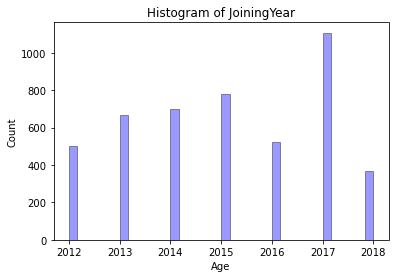

In [18]:
sns.distplot(raw_df['JoiningYear'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of JoiningYear')
plt.xlabel('Age'); plt.ylabel('Count');